In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [5]:
#GC -- Kiwi Parameterization
def kiwi_fit(G_0, Q_0):
    
    def fitting_function(Q2, a, b, c):
        Q_fm = np.sqrt(Q2)*(1./0.1973) #Q in fm^-1

        poly = (1+a*Q_fm**2)*(1+b*Q_fm**2)*(1+c*Q_fm**2)
        
        return G_0 * (1. - np.power((Q_fm/Q_0),2)) * (1./poly)
    
    return fitting_function

[0.04840772 0.04840393 0.62385733]


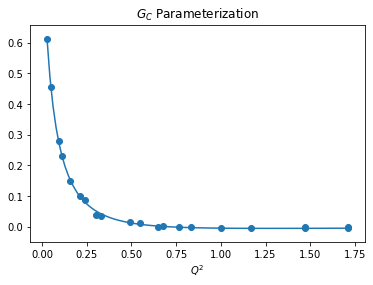

In [9]:
g_c_data = np.loadtxt('input_files/GC_Data.txt')
Q2 = g_c_data[:, 0]
GC = g_c_data[:, 1]
GC_error_hi = g_c_data[:, 2]
GC_error_lo = g_c_data[:, 3]

g_c_fit_function = kiwi_fit( 1., 4.21 )

popt, pcov = curve_fit( g_c_fit_function, Q2, GC, bounds = (0,np.inf) )
print(popt)

kiwi_Q2 = np.linspace(Q2[0], Q2[-1], 100)
kiwi_GC = g_c_fit_function(kiwi_Q2, *popt)

plt.title('$G_C$ Parameterization')
plt.xlabel('$Q^2$')
plt.scatter(Q2, GC)
plt.plot( kiwi_Q2, kiwi_GC )

plt.savefig('g_c_parameterization.png')

[0.03888556 0.68000018 0.03888574]


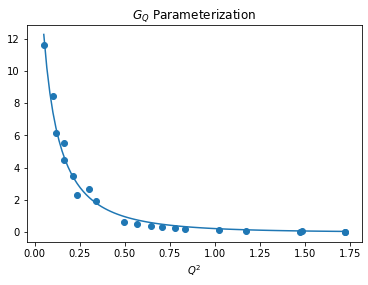

In [10]:
g_q_data = np.loadtxt('input_files/GQ_Data.txt')
Q2 = g_q_data[:, 0]
GQ = g_q_data[:, 1]
GQ_error_hi = g_q_data[:, 2]
GQ_error_lo = g_q_data[:, 3]

g_q_fit_function = kiwi_fit( 25.83, 8.1 )

popt, pcov = curve_fit( g_q_fit_function, Q2, GQ, bounds = (0,np.inf) )
print(popt)

interp_Q2 = np.linspace(Q2[0], Q2[-1], 100)
interp_GQ = g_q_fit_function(interp_Q2, *popt)

plt.title('$G_Q$ Parameterization')
plt.xlabel('$Q^2$')
plt.scatter(Q2, GQ)
plt.plot( interp_Q2, interp_GQ )

plt.savefig('g_q_parameterization.png')

[0.05675998 0.57117507 0.05675859]


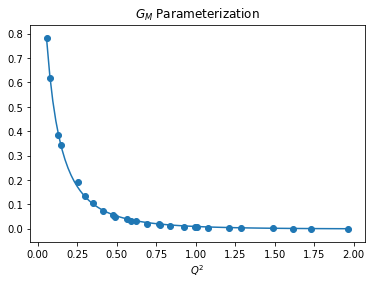

In [11]:
g_m_data = np.loadtxt('input_files/GM_Data.txt')
Q2 = g_m_data[:, 0]
GM = g_m_data[:, 1]
GM_error_hi = g_m_data[:, 2]
GM_error_lo = g_m_data[:, 3]

g_m_fit_function = kiwi_fit( 1.714, 7.37 )

popt, pcov = curve_fit( g_m_fit_function, Q2, GM, bounds = (0,np.inf) )
print(popt)

interp_Q2 = np.linspace(Q2[0], Q2[-1], 100)
interp_GM = g_m_fit_function(interp_Q2, *popt)

plt.title('$G_M$ Parameterization')
plt.xlabel('$Q^2$')
plt.scatter(Q2, GM)
plt.plot( interp_Q2, interp_GM )

plt.savefig('g_m_parameterization.png')